In [75]:
## extract classes 

import os
import shutil

def extract_classes(source, classes):

    dirname = os.path.dirname(__file__)
    source_directory = os.path.join(dirname, source)
    print("source: " + source_directory)
  
    for c in classes:
        temp = os.path.join(dirname, c)
        print( c + ": " + temp)
        os.makedirs(temp, exist_ok=True)

    for filename in os.listdir(source_directory):
        for c in classes:
            if c in filename:
                shutil.move(os.path.join(source_directory, filename), os.path.join(dirname,c, filename))

extract_classes("raw" , ["cat" , "dog"])

NameError: name '__file__' is not defined

In [ ]:
## split folders
# pip install split-folders

import splitfolders
import os

dirname = os.path.dirname(__file__)
# input: folder that contsins all classes sub folders
splitfolders.ratio(os.path.join(dirname, "raw"), output=os.path.join(dirname, "processed"), seed=42, ratio=(0.6, 0.2, 0.2))


In [16]:
## read and resized images
# pip install opencv-python

import glob
import cv2
import numpy as np
import os

target_size = (128, 128)

def read_resize_images(source_dir , categories):
    x_temp = []
    y_temp = []
    for category in categories:
        for filepath in glob.glob(os.path.join(source_dir, category, "*")):
            img = cv2.imread(filepath)
            img = cv2.resize(img, target_size)
            img = np.array(img)
            y_temp.append(categories.index(category))
            x_temp.append(img)

    print("folder: " + os.path.join(source_dir))
    print(len(x_temp))
    print(type(x_temp[0])) 
    print(x_temp[0])   
    return x_temp , y_temp

# source file, catefories list
x_train , y_train = read_resize_images( "D:\\Artificial Intelligence\\Machine Learning\\_projects\\dogs_cats_classification\\data\\processed\\train", ["cat", "dog"])
x_test , y_test = read_resize_images( "D:\\Artificial Intelligence\\Machine Learning\\_projects\\dogs_cats_classification\\data\\processed\\test", ["cat", "dog"])
x_val , y_val = read_resize_images( "D:\\Artificial Intelligence\\Machine Learning\\_projects\\dogs_cats_classification\\data\\processed\\val", ["cat", "dog"])



folder: D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\processed\train
15000
<class 'numpy.ndarray'>
[[[ 87 164 203]
  [ 93 170 209]
  [ 94 171 210]
  ...
  [125 207 247]
  [119 204 245]
  [122 201 240]]

 [[ 87 164 203]
  [ 93 170 209]
  [ 94 171 210]
  ...
  [128 209 247]
  [122 205 245]
  [123 202 241]]

 [[ 87 164 203]
  [ 93 170 209]
  [ 94 171 210]
  ...
  [130 210 247]
  [125 206 244]
  [124 203 242]]

 ...

 [[ 53 124 158]
  [ 55 126 160]
  [ 56 127 161]
  ...
  [  0   4   3]
  [  0   4   3]
  [  0   2   2]]

 [[ 56 123 154]
  [ 58 125 156]
  [ 60 127 158]
  ...
  [  1   3   3]
  [  1   3   3]
  [  1   3   3]]

 [[ 54 121 152]
  [ 55 122 153]
  [ 59 126 157]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]]
folder: D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\processed\test
5000
<class 'numpy.ndarray'>
[[[ 68 120 144]
  [ 62 114 137]
  [ 64 116 139]
  ...
  [179 155 209]
  [188 164 218]
  [177 159

In [39]:
## show statistics

def show_statiscs(y_temp , categories):
    
    scores = []

    for c in categories:
        scores.append(0)
    
    for y in y_temp:
        scores[y] = scores[y] + 1

    for idx in range(len(categories)):
        print(categories[idx] + ": " + str(scores[idx]))

show_statiscs(y_train , ["cat", "dog"])

cat: 7500
dog: 7500


In [42]:
## build model
# pip install tensorflow
# pip install keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: cat or dog
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,225 (10.48 MB)

 Trainable params: 2,748,225 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# pip install pydot graphviz
# pip install graphviz

from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - accuracy: 0.5438 - loss: 0.6855
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 221ms/step - accuracy: 0.6591 - loss: 0.6266
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 266ms/step - accuracy: 0.7377 - loss: 0.5267
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 124s 265ms/step - accuracy: 0.7838 - loss: 0.4653
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 240ms/step - accuracy: 0.8157 - loss: 0.4038
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.8377 - loss: 0.3751
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 124s 265ms/step - accuracy: 0.8644 - loss: 0.3249
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 263ms/step - accuracy: 0.8773 - loss: 0.2876
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 206ms/step - accuracy: 0.8980 - loss: 0.2496
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9079 - loss: 0.2265
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.9233 - loss: 0.1883
Epoch 12/20

KeyError: 'val_accuracy'

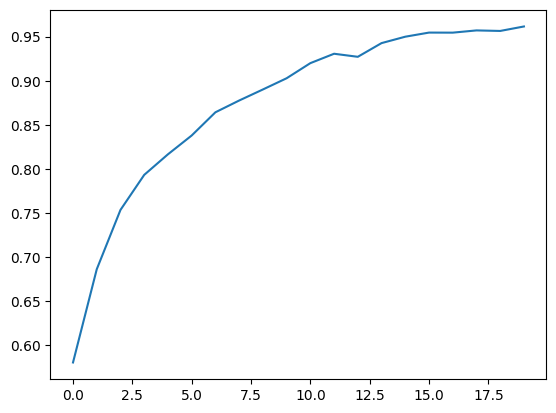

In [44]:
## normal trainig of the model
# history = model.fit(np.array(x_train), np.array(y_train), epochs=20, batch_size=32)


## trainig with stopping condition
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
# Monitor 'accuracy' and stop training when it reaches 0.95
# Set `min_delta` to a very small value to stop when accuracy improvement is very small
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0.0001, patience=5, verbose=1, mode='max', baseline=0.95)

# Train the model with EarlyStopping callback
history = model.fit(np.array(x_train), np.array(y_train), epochs=20, batch_size=32, callbacks=[early_stopping])



dict_keys(['accuracy', 'loss'])


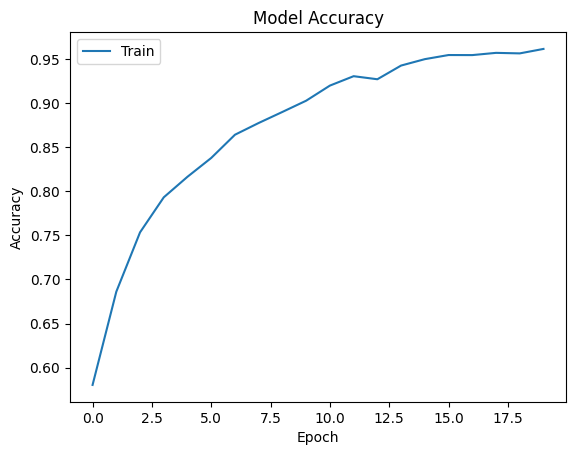

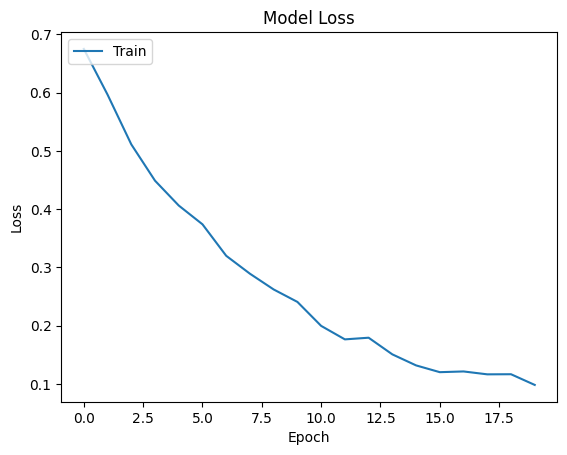

In [47]:
## show trainig history details 

# Access the training history
print(history.history.keys())

# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.8893 - loss: 0.4666
Test Loss: 0.5753538012504578, Test Accuracy: 0.8586000204086304
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step
Precision: 0.8933742869679684
Recall: 0.8144
Confusion Matrix:
[[2257  243]
 [ 464 2036]]


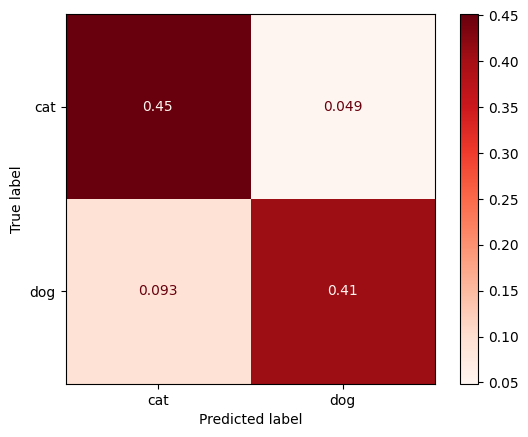

In [90]:
## Evaluate model

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# loss and accuracy
loss, accuracy = model.evaluate(np.array(x_test), np.array(y_test))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Calculate precision and recall
y_pred = model.predict(np.array(x_test))
y_pred = (y_pred > 0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## draw confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

categories = ["cat", "dog"]
cm = confusion_matrix(y_test, y_pred)
cm = cm / np.sum(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [52]:
## save the model with timestamp namd

import os
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Get the current working directory of the notebook
cwd = os.getcwd()

# Define the model name with the timestamp
model_name = f"model_{timestamp}.h5"

# Save the model
model.save(os.path.join(cwd, model_name))

# Print confirmation message
print("Model saved at:", os.path.join(cwd, model_name))


Model saved at: d:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\_notebooks\model_20240409_235726.h5


In [72]:
## load the model and predict random sample

import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tkinter import filedialog
import tkinter as tk
from datetime import datetime

# Function to preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    # only normalize if the training input was normalized
    # img = img / 255.0  # Normalize pixel values
    return img

# Function to open file dialog and choose an image
def choose_image():
    root = tk.Tk()
    root.withdraw()  # Hide the root window

    # Show file dialog to choose an image
    file_path = filedialog.askopenfilename(title="Choose an image")

    return file_path

def test_image(img_path):
    img = preprocess_image(img_path)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    print(img_path)
    if prediction[0][0] > 0.5:
        print("Prediction: Dog")
        if("dog" in img_path):
            return True
    else:
        print("Prediction: Cat")
        if("cat" in img_path):
            return True
    return False

def test_folder(folder_path):

    test_scores = []
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            test_scores.append(test_image(file_path))
    
    true_values = [value for value in test_scores if value]
    print("Random Accuracy: " + str(len(true_values) / len(test_scores)))

# Get the current working directory of the notebook
cwd = os.getcwd()

# Get all .h5 model files in the current directory
model_files = [file for file in os.listdir(cwd) if file.endswith('.h5')]

# Get the most recent model file
latest_model_file = max(model_files, key=os.path.getctime)

# Load the most recent model
model = load_model(os.path.join(cwd, latest_model_file))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Call the function to choose an image
# img_path = choose_image()
# test_image("D:\\Artificial Intelligence\\Machine Learning\\_projects\\dogs_cats_classification\\data\\random\\catty_dog.png")
test_folder("D:\\Artificial Intelligence\\Machine Learning\\_projects\\dogs_cats_classification\\data\\random")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\random\cat.102.jpg
Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\random\cat.104.jpg
Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\random\cat.105.jpg
Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\random\cat.107.jpg
Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\random\cat.116.jpg
Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
D:\Artificial Intelligence\Machine Learning\_projects\dogs_cats_classification\data\random\cat.124.jpg
Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
D:\Artificial Intel